# Exploratory data analysis

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
DATASET_PATH = '../dataset'
CSV_PATH = '../'

In [3]:
label_df = pd.read_csv(os.path.join(CSV_PATH, 'bs_labels.csv'))
label_df.head(10)

,file_path,file_name,label,subset
0,wasp/1331787019_ca513a7acf_n.jpg,1331787019_ca513a7acf_n.jpg,wasp,train
1,bee/14322267704_2ac34a2af2_n.jpg,14322267704_2ac34a2af2_n.jpg,bee,train
2,wasp/7382817412_b5a0f8c899_w.jpg,7382817412_b5a0f8c899_w.jpg,wasp,train
3,wasp/4250759545_eb707b1145_n.jpg,4250759545_eb707b1145_n.jpg,wasp,train
4,other_insect/insect3.jpg,insect3.jpg,other_insect,train
5,other_insect/insect_image_204.jpg,insect_image_204.jpg,other_insect,train
6,other_insect/8542836797_477176edca_n.jpg,8542836797_477176edca_n.jpg,other_insect,train
7,bee/1324904081_75fdbb7ace_n.jpg,1324904081_75fdbb7ace_n.jpg,bee,train
8,bee/15063164899_4b3d4e7082_w.jpg,15063164899_4b3d4e7082_w.jpg,bee,train
9,wasp/6103665305_b52694b9a9_m.jpg,6103665305_b52694b9a9_m.jpg,wasp,train


## Check null values

In [4]:
print('Null values')
label_df.isnull().sum()

Null values


file_path    0
file_name    0
label        0
subset       0
dtype: int64

## Check distribution of training and test sets

Let's visually check if we have correctly generated the training, validation and test subsets.

In [5]:
label_df.value_counts('subset')

subset
train         10122
test           1266
validation     1265
dtype: int64

In [6]:
train_perc = round(label_df.value_counts('subset')['train']/len(label_df) * 100, 2)
val_perc = round(label_df.value_counts('subset')['validation']/len(label_df) * 100, 2)
test_perc = round(label_df.value_counts('subset')['test']/len(label_df) * 100, 2)

In [7]:
print(f'Train subset - {train_perc}%')
print(f'Validation subset - {val_perc}%')
print(f'Test subset - {test_perc}%')

Train subset - 80.0%
Validation subset - 10.0%
Test subset - 10.01%


In [8]:
def create_piechart(subset='train'):
    df_s = label_df[label_df['subset'] == subset]
    labels = df_s['label'].value_counts().index
    sizes = df_s['label'].value_counts().values

    plt.figure(figsize=[5, 5])
    plt.pie(sizes,
            colors=plt.cm.tab20_r.colors,
            labels=labels,
            autopct='%1.1f%%',
            pctdistance=0.80,
            explode=(0.02, 0.02, 0.02, 0.02),
            textprops={'fontsize': 12})

    centre_circle = plt.Circle((0, 0), 0.60, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    plt.title(f'{subset.capitalize()} subset class distribution', fontsize=16)

    plt.tight_layout()
    plt.show()
    
    print(df_s['label'].value_counts())

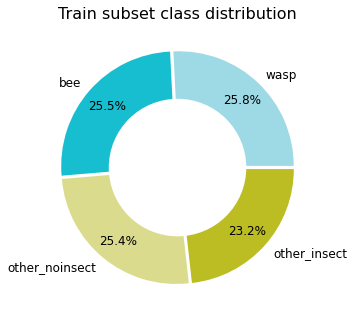

wasp              2611
bee               2586
other_noinsect    2574
other_insect      2351
Name: label, dtype: int64


In [9]:
create_piechart()

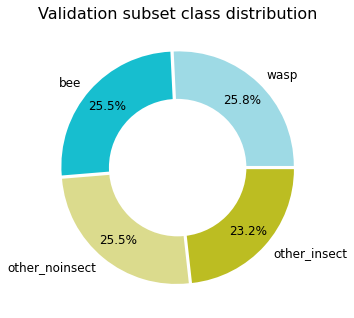

wasp              326
bee               323
other_noinsect    322
other_insect      294
Name: label, dtype: int64


In [10]:
create_piechart('validation')

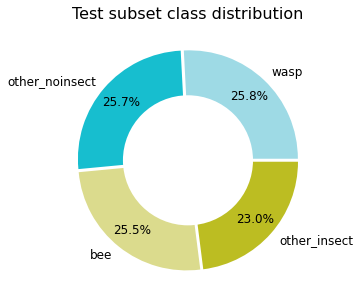

wasp              327
other_noinsect    325
bee               323
other_insect      291
Name: label, dtype: int64


In [11]:
create_piechart('test')

## Show samples of each class

In [12]:
def display_img_samples(subset='train', samples_num=5):
    fig, axs = plt.subplots(4, samples_num, figsize=(samples_num * 8, 32))
    
    for i, label in enumerate(label_df['label'].unique()):
        samples = label_df[(label_df['subset'] == subset)
                           & (label_df['label'] == label)].sample(5)
        
        for j in range(samples_num):
            img_path = os.path.join(DATASET_PATH, label,
                                    samples.iloc[j]['file_name'])
            img = cv2.imread(img_path)
            img = cv2.resize(img, (128, 128))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axs[i][j].imshow(img)
            axs[i][j].set_title(label, fontsize=30)
    
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
    fig.tight_layout()

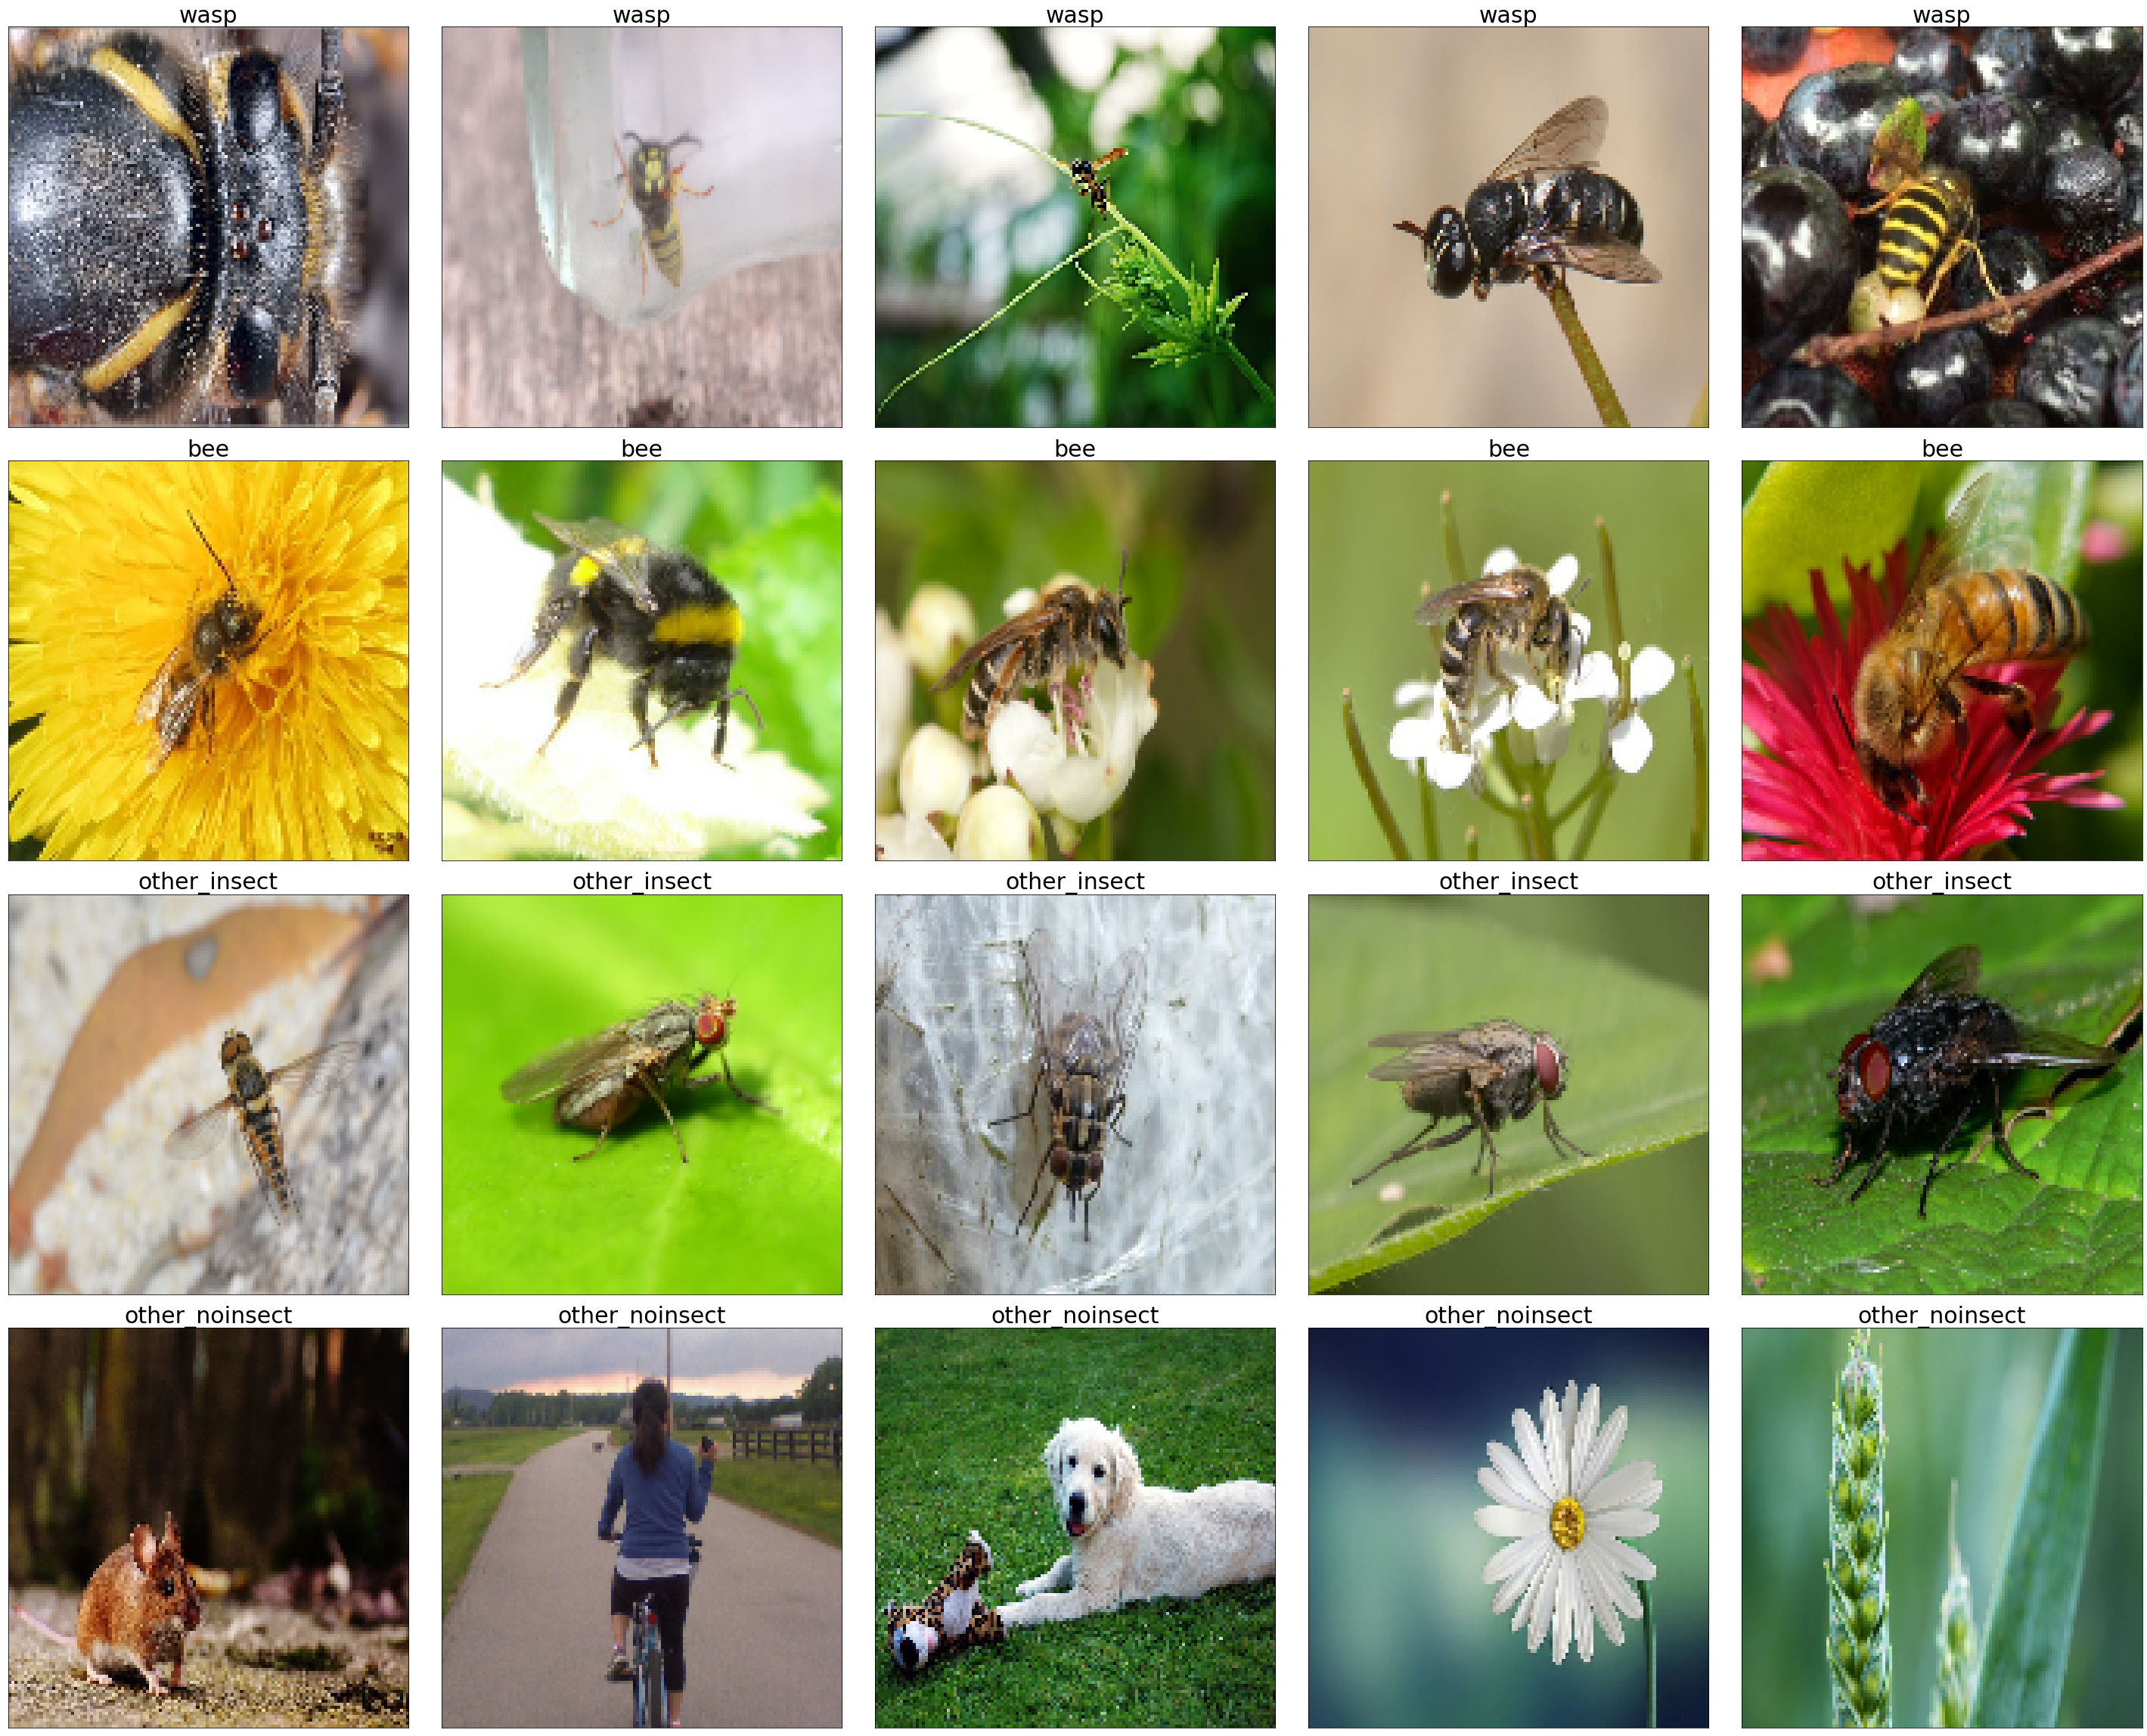

In [13]:
display_img_samples(subset='train', samples_num=5)